c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


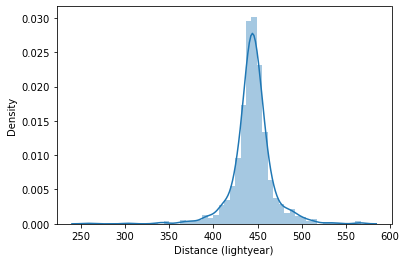

Average distance (lightyear) is 444.36412634191964


In [2]:
#QUESTION 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
df = pd.read_csv('Pleiades_Cluster.csv')
gmag = df.loc[:,'gmag'].values
plx = df.loc[:,'plx'].values
dist = 1000/plx
M = gmag-5*np.log10(dist/10)
dist_ly = np.array([])
for i in range(len(dist)):
    if dist[i]<200:
        dist_ly = np.append(dist_ly,dist[i])
dist_ly = ((dist_ly*u.parsec).to(u.lyr)).value
sns.distplot(dist_ly,hist=True)
plt.xlabel('Distance (lightyear)')
plt.show()
avg_dist = np.average(dist_ly)
print('Average distance (lightyear) is',avg_dist)

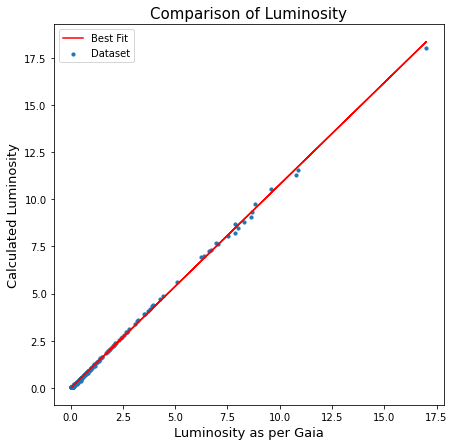

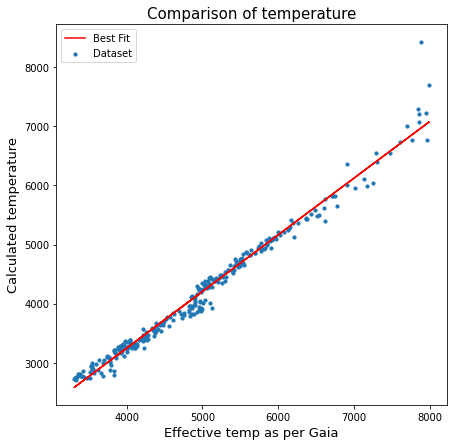

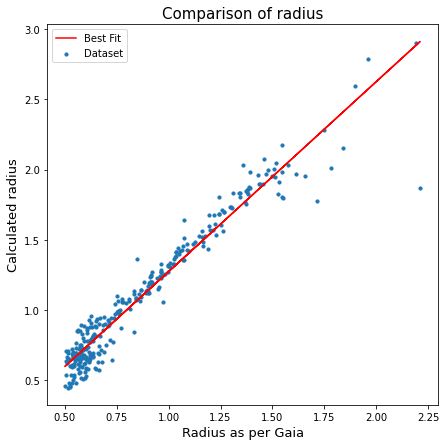

In [3]:
#QUESTION 2
from astropy import constants as const
from scipy.optimize import curve_fit as cf
def f(x,m,c):
    return m*x+c
df1 = df.assign(L_value = 10**((4.77-(df['gmag']-5*np.log10(100/df['plx'])))/2.5))
df1 = df1.dropna()
df1 = df1.assign(Temp = 5601/((df['bp_rp']+0.4)**(2/3)))
df1 = df1.assign(Radius = np.sqrt(df1['L_value'])/((df1['Temp']/5601)**2))
#CURVE FITTING LUMINOSITY
p_opt,p_cov = cf(f,df1['lum_val'],df1['L_value'])
plt.figure(figsize=(7,7))
plt.plot(df1['lum_val'],f(df1['lum_val'],*p_opt),'r',label='Best Fit')
plt.scatter(df1['lum_val'],df1['L_value'],s=10, label='Dataset')
plt.xlabel('Luminosity as per Gaia',size=13)
plt.ylabel('Calculated Luminosity',size=13)
plt.title('Comparison of Luminosity',size=15)
plt.legend()
#CURVE FITTING TEMPERATURE
p_opt,p_cov = cf(f,df1['teff_val'],df1['Temp'])
plt.figure(figsize=(7,7))
plt.plot(df1['teff_val'],f(df1['teff_val'],*p_opt),'r',label='Best Fit')
plt.scatter(df1['teff_val'],df1['Temp'],s=10, label='Dataset')
plt.xlabel('Effective temp as per Gaia',size=13)
plt.ylabel('Calculated temperature',size=13)
plt.title('Comparison of temperature',size=15)
plt.legend()
#CURVE FITTING RADIUS
p_opt,p_cov = cf(f,df1['radius_val'],df1['Radius'])
plt.figure(figsize=(7,7))
plt.plot(df1['radius_val'],f(df1['radius_val'],*p_opt),'r',label='Best Fit')
plt.scatter(df1['radius_val'],df1['Radius'],s=10, label='Dataset')
plt.xlabel('Radius as per Gaia',size=13)
plt.ylabel('Calculated radius',size=13)
plt.title('Comparison of radius',size=15)
plt.legend()

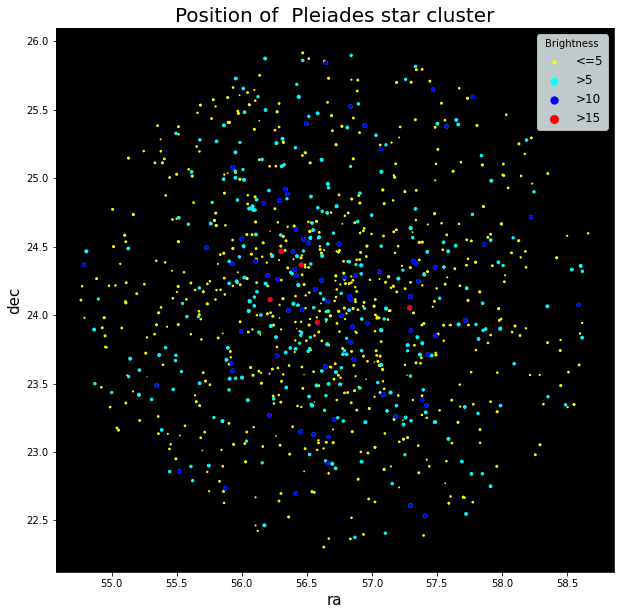

In [4]:
#QUESTION 3
brightness = np.amax(gmag)-gmag
df = df.assign(bright = brightness)
d1 = df[df['bright']<=5]
d2 = df[df['bright']>5]
d3 = df[df['bright']>10]
d4 = df[df['bright']>15]
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('black')
plt.scatter(d1['ra'],d1['dec'],s=d1['bright'],color="yellow",label='<=5')
plt.scatter(d2['ra'],d2['dec'],s=d2['bright'],color="cyan",label='>5')
plt.scatter(d3['ra'],d3['dec'],s=d3['bright'],color="blue",label='>10')
plt.scatter(d4['ra'],d4['dec'],s=d4['bright'],color="red",label='>15')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.title('Position of  Pleiades star cluster',size=20)
plt.legend(markerscale=2,fontsize=12,facecolor="azure",title="Brightness")

Text(0.5, 1.0, 'Hertzsprung-Russell Diagram for Pleiades star cluster')

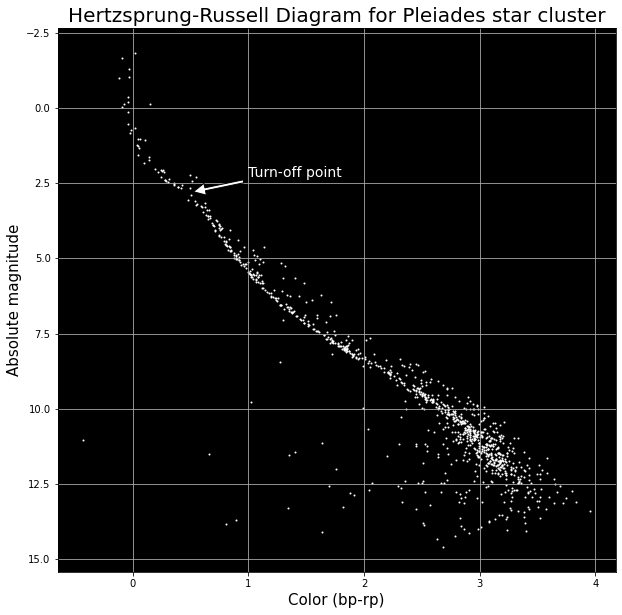

In [6]:
#QUESTION 4
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('black')
plt.gca().invert_yaxis()
plt.scatter(df['bp_rp'],M,color='white',s=1)
plt.xlabel('Color (bp-rp)',size=15)
plt.ylabel('Absolute magnitude',size=15)
plt.annotate('Turn-off point',xy=(0.5,2.8),xytext=(1,2.3),arrowprops = dict(width=3,facecolor ='white',shrink = 0.05),fontsize=14,color='white')
plt.grid()
plt.title('Hertzsprung-Russell Diagram for Pleiades star cluster',size=20)